<a href="https://colab.research.google.com/github/EDafee1/dm-project/blob/main/%5BDafi%5D_UTS_DS_BengkelKoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDIKSI CUACA**

Dalam project ini kita akan melakukan prediksi cuaca dengan dataset **seattle-weather**.

Link **dataset**:
https://drive.google.com/file/d/1IIyYZEQReb4VavO_piu3qQeGK6VcwGJm/view?usp=sharing

## **Data Preprocessing**

1. Isi _code-cell_ dibawah dengan kode untuk:
    - **membaca dataset** _seattle-weather_
    - **menampilkan 15** baris data teratas



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/seattle-weather.csv')
df.head(15)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


2. Munculkan **informasi** dataset dan lakukan **cleaning data** yang dibutuhkan:
    - mengecek dan menghapus **nilai kosong**
    - menghapus (**_drop_**) kolom _"date"_
    - mengecek dan menghapus data yang memiliki **nilai duplikat**

In [ ]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [ ]:
df = df.drop(['date'], axis=1)

In [ ]:
df.duplicated().sum()

8

In [ ]:
df = df.drop_duplicates()

## **Visualisasi**

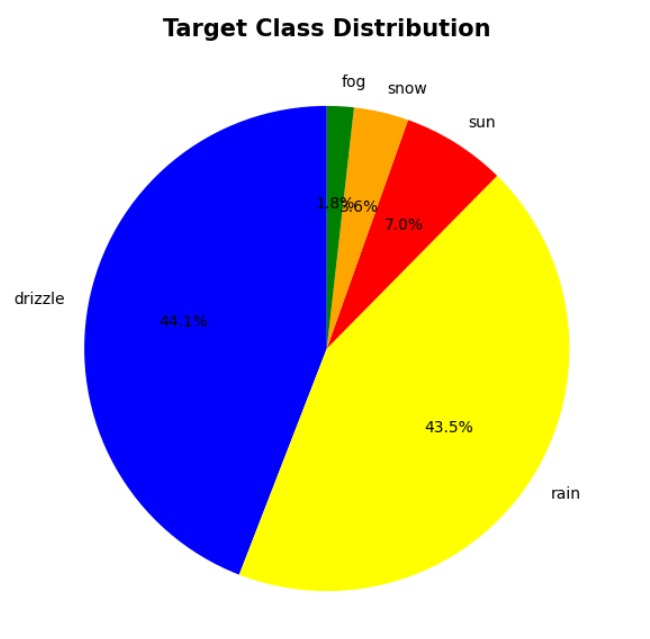

3. Diatas adalah contoh visualisasi menggunakan _diagram pie_,

    buatlah **visualisasi distribusi _target-class_** seperti diatas!

In [ ]:
import matplotlib.pyplot as plt

<Axes: ylabel='weather'>

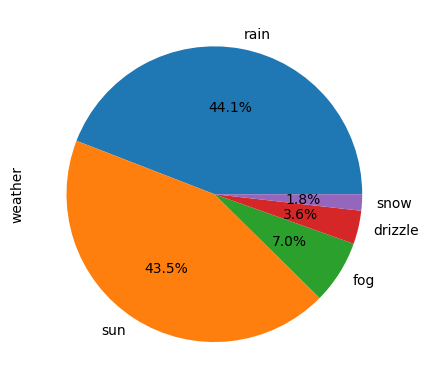

In [ ]:
df['weather'].value_counts().plot(kind='pie', autopct='%1.1f%%')

4. Anda akan melakukan **visualisasi relasi antar fitur** menggunakan _diagram scatter_.

    Perbaiki kata **'fix_me'** pada _code-cell_ dibawah!

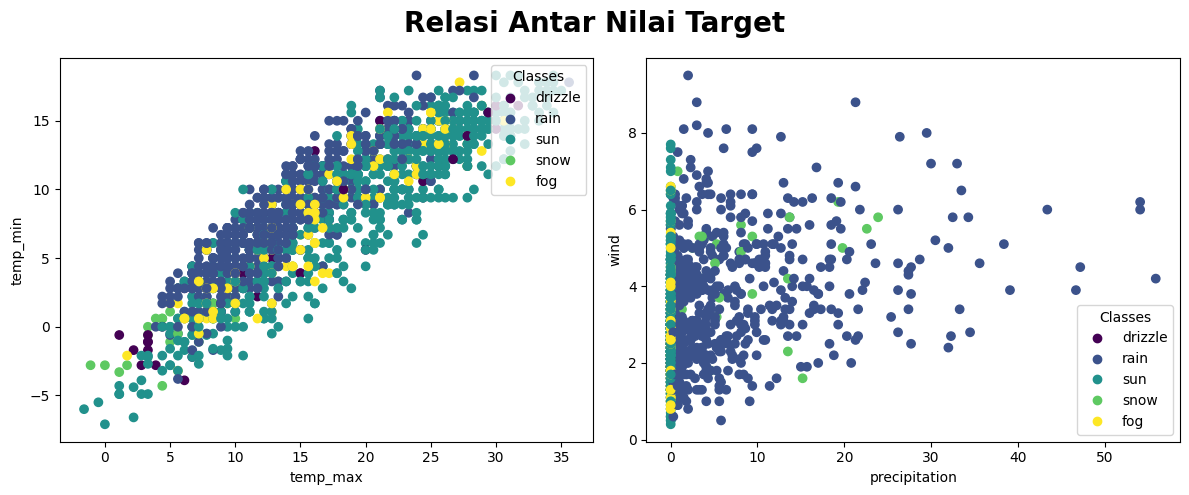

In [ ]:
target_names= df['weather'].unique()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

target = df['weather'].replace({
  'drizzle': 0,
  'rain': 1,
  'sun': 2,
  'snow': 3,
  'fog': 4
})

# Visualisasi relasi fitur temp_max dan temp_min
a_scatter =axs[0].scatter(df['temp_max'], df['temp_min'], c=target)
axs[0].set(xlabel="temp_max", ylabel="temp_min")
axs[0].legend(a_scatter.legend_elements()[0], target_names, loc="upper right", title="Classes")

# Visualisasi relasi fitur precipitation dan wind
b_scatter = axs[1].scatter(df['precipitation'], df['wind'], c=target)
axs[1].set(xlabel="precipitation", ylabel="wind")
axs[1].legend(b_scatter.legend_elements()[0], target_names, loc="lower right", title="Classes")

fig = fig.suptitle("Relasi Antar Nilai Target", fontsize=20, fontweight="bold")
plt.tight_layout()

<Axes: xlabel='temp_min', ylabel='Count'>

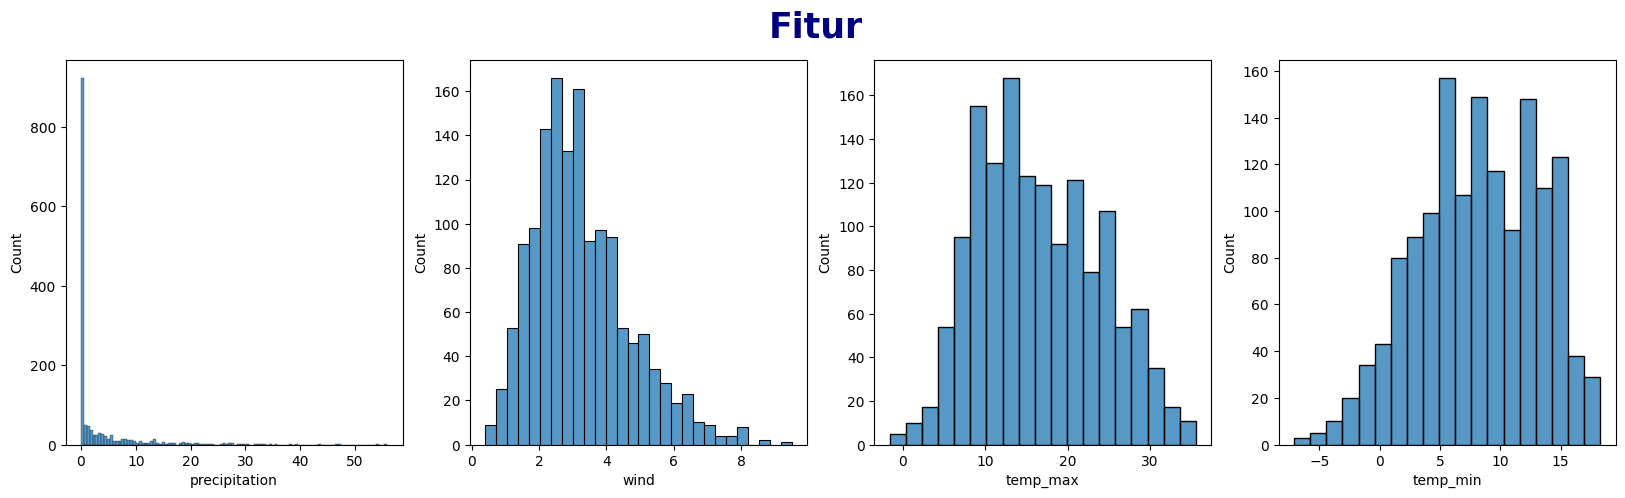

In [ ]:
import seaborn as sns

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
plt.suptitle('Fitur', fontsize=25, fontweight='bold', color='navy')

# axis 1
sns.histplot(data=df, x='precipitation', ax=axes[0])

# axis 2
sns.histplot(data=df, x='wind', ax=axes[1])

# axis 3
sns.histplot(data=df, x='temp_max', ax=axes[2])

# axis 4
sns.histplot(data=df, x='temp_min', ax=axes[3])

## **Modelling**

5. **Bagi dataset** menjadi _train-set_ dan _test-set_ dengan ketentuan sebagai berikut:

    a. X = seluruh kolom fitur kecuali kolom target

    b. y = kolom target
    
    c. Bagi dengan rasio 70% _train-set_ dan 30% _test-set_

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['weather'], axis=1)
X.head()

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1


In [ ]:
y = target
y.head()

0    0
1    1
2    1
3    1
4    1
Name: weather, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [ ]:
df.count()

precipitation    1453
temp_max         1453
temp_min         1453
wind             1453
weather          1453
dtype: int64

In [ ]:
X_train.count()

precipitation    1017
temp_max         1017
temp_min         1017
wind             1017
dtype: int64

In [ ]:
X_test.count()

precipitation    436
temp_max         436
temp_min         436
wind             436
dtype: int64

6. **Perbaiki kata 'fix_me'** pada _code-cell_ dibawah untuk **menampilkan visualisasi rasio _target-class_** pada _train-set_ dan _test-set_!

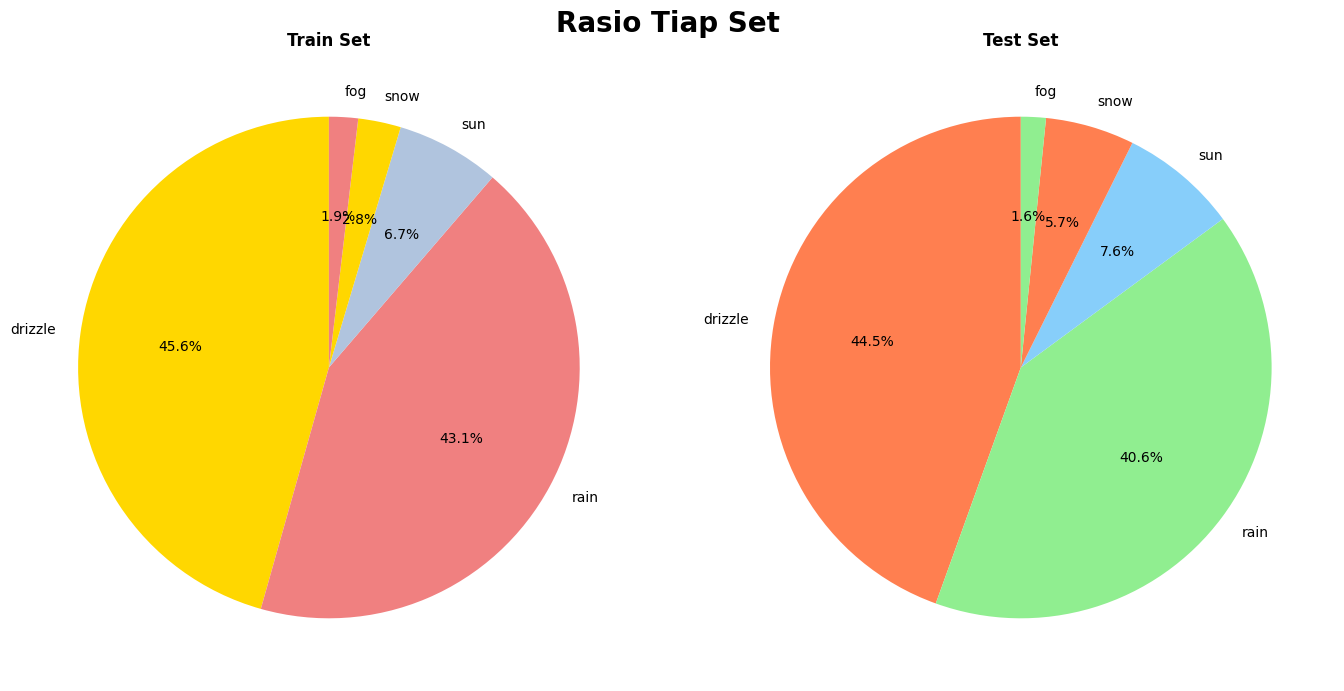

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
target_names = df['weather'].unique()
colors1 = ['gold', 'lightcoral', 'lightsteelblue']
colors2 = ['coral', 'lightgreen', 'lightskyblue']

#Train dataset
axs[0].pie(y_train.value_counts(), labels=target_names, colors=colors1, autopct='%1.1f%%', startangle=90)
axs[0].set_title("Train Set", fontweight="bold")

#Test dataset
axs[1].pie(y_test.value_counts(), labels=target_names, colors=colors2, autopct='%1.1f%%', startangle=90)
axs[1].set_title("Test Set", fontweight="bold")

fig = fig.suptitle("Rasio Tiap Set", fontsize=20, fontweight="bold")
plt.tight_layout()

7.  Buatlah model dengan salah satu algoritma klasifikasi lalu latih dan prediksi dataset!

In [ ]:
from sklearn import tree

In [ ]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)

In [ ]:
pred = model.predict(X_test)

## **Evaluasi**

8. Munculkan akurasi yang dihasilkan dari model yang anda gunakan.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc = accuracy_score(y_test, pred)

In [ ]:
acc

0.7224770642201835

## **Esai**

9. Berikan kesimpulan dari project yang telah anda buat.

<font color="#e99823"><h2><strong>Kesimpulan</strong></h2></font>

Berdasarkan hasil percobaan diatas, akurasi yang didapatkat untuk mengklasifikasikan cuaca dengan menggunakan <strong>DecisionTreeClassifier</strong> adalah <strong>72%</strong>. Dalam konteks percobaan pertama tanpa adanya hyperparameter tuning dan juga perpandingan dengan algoritma lain, hasil ini sudah cukup bagus.

Peningkatan yang mungkin dapat dilakukan adalah dengan mengolah dataset agar lebih seimbang, atau mencoba melakukan training dengan metode lain. Mungkin bisa mulai dengan menggunakan Neural sederhana untuk melakukan pelatihan.

10. Upload dan lampirkan link
    - **Video** penjelasan berdurasi 10-15 menit mengenai project anda.
    - **Repository Github** berisi file notebook (_.ipynb_) anda.

In [ ]:
link_video = ""
link_github = ""